In [1]:
#ANALYSING THE DATA USING VISUALIZATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


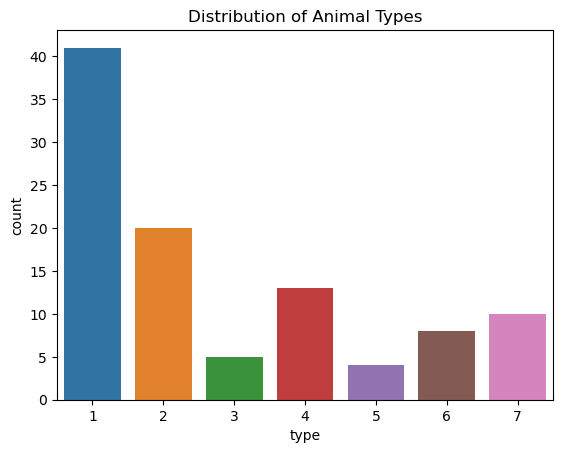

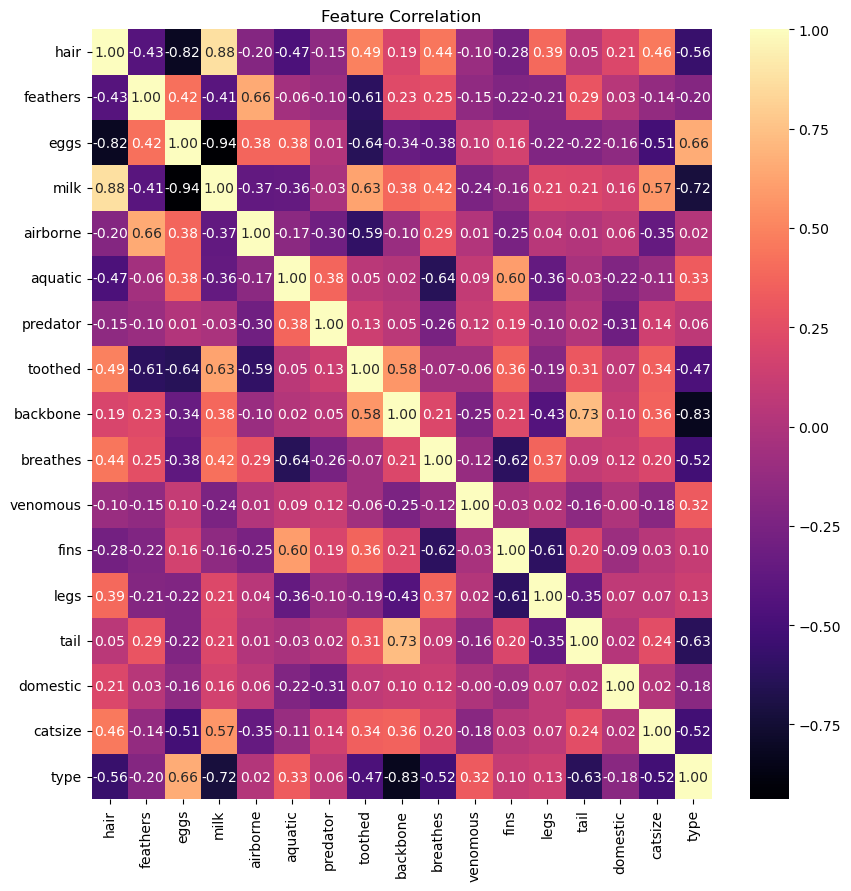

In [4]:
# Count of each animal type
sns.countplot(x='type', data=df)
plt.title("Distribution of Animal Types")
plt.show()
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='magma')
plt.title("Feature Correlation")
plt.show()

In [5]:
# Check for missing values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
# Features and target
X = df.drop(columns=["animal name", "type"])
y = df["type"]
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# KNN model: k=5, Euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
# Predictions
y_pred = knn.predict(X_test)
# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21

Accuracy: 0.9523809523809523


In [7]:
#3. Visualize Decision Boundaries (PCA for 2D Projection)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Apply PCA to reduce to 2D
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)
# Refit KNN on 2D data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, y)
# Meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

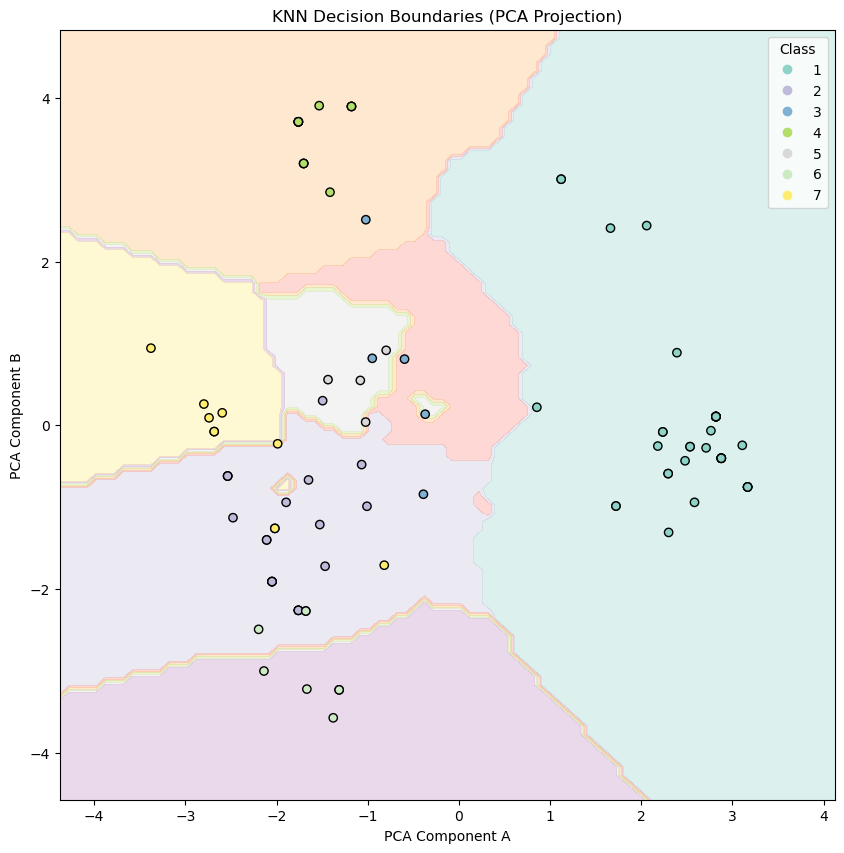

In [9]:
# Plot decision boundaries
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set3')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap='Set3')
plt.title("KNN Decision Boundaries (PCA Projection)")
plt.xlabel("PCA Component A")
plt.ylabel("PCA Component B")
plt.legend(*scatter.legend_elements(), title="Class")
plt.show()

In [10]:
"""
1. What are the key hyperparameters in KNN?
Key hyperparameters:
n_neighbors (K):
-->Number of nearest neighbors to consider.
-->Choosing a small K can make the model sensitive to noise; large K can smooth out predictions.
weights:
How the influence of neighbors is weighted:
-->'uniform': All neighbors are equally weighted
-->'distance': Closer neighbors have more influence
metric:
-->The distance function used to find neighbors (e.g., Euclidean, Manhattan, etc.).
algorithm:
-->How the neighbors are searched:
'auto', 'ball_tree', 'kd_tree', 'brute'
Affects performance, not accuracy.
leaf_size (used with ball_tree or kd_tree):
Affects the speed of the tree-based algorithms.

2. What distance metrics can be used in KNN?
Common distance metrics:

Euclidean distance : √[(x1−y1)² + ... + (xn−yn)²]:Suitable for continuous variables.

Manhattan distance: |x1−y1| + ... + |xn−yn|:Good for high-dimensional or sparse data.

Minkowski distance: Generalized form where p=1 (Manhattan), p=2 (Euclidean)

Cosine similarity, Hamming distance (for binary/categorical data)
Measures orientation, not magnitude—good for text or high-dimensional sparse data.
"""


"\n1. What are the key hyperparameters in KNN?\nKey hyperparameters:\nn_neighbors (K):\n-->Number of nearest neighbors to consider.\n-->Choosing a small K can make the model sensitive to noise; large K can smooth out predictions.\nweights:\nHow the influence of neighbors is weighted:\n-->'uniform': All neighbors are equally weighted\n-->'distance': Closer neighbors have more influence\nmetric:\n-->The distance function used to find neighbors (e.g., Euclidean, Manhattan, etc.).\nalgorithm:\n-->How the neighbors are searched:\n'auto', 'ball_tree', 'kd_tree', 'brute'\nAffects performance, not accuracy.\nleaf_size (used with ball_tree or kd_tree):\nAffects the speed of the tree-based algorithms.\n\n2. What distance metrics can be used in KNN?\nCommon distance metrics:\n\nEuclidean distance : √[(x1−y1)² + ... + (xn−yn)²]:Suitable for continuous variables.\n\nManhattan distance: |x1−y1| + ... + |xn−yn|:Good for high-dimensional or sparse data.\n\nMinkowski distance: Generalized form where p=